**Trabalho para Disciplina de Aprendizado de Maquina - SME0829**

**Alunos:**
* André Sacilotti - 10728226
* Pedro Henrique Freitas Maiorano - 12701748
* Wemerson Mauricio dos Santos - 11943757
* Willian Franco Bernardes Custódio da Silva da Silveira - 7564030

**Professora:**
* Dra. Cibele Russo

# 1. Descrição do problema

O problema escolhido por nosso grupo consiste em realizar uma previsão de Churn para uma empresa de Telco. O churn, ou rotatividade de clientes, consiste no problema em que os clientes cancelam um produto de uma determinada empresa. É evidente que esses cancelamentos afetam os ganhos que a empresa pode ter.

A importância dessa modelagem reside no fato de se ter um modelo pode ajudar a prever os clientes que, possivelmente, cancelariam o produto. Com isso, a empresa pode desenvolver estratégias focadas nesses clientes de modo a diminuir os números de cancelamento. Destaca-se que, pela natureza do problema, é possível que a base de dados seja desbalanceada, isto é, pode haver mais clientes que não cancelam os produtos do que os que cancelam.

Dentro deste projeto, a abordagem selecionada para tratar o problema é o de classificação (prever se um cliente vai ou não cancelar o produto), uma outra abordagem seria de modelar os dados usando técnicas de análises de sobrevivência, isto é, usando como variável resposta o tempo até o cancelamento do produto.

A base de dados analisada ao longo do projeto foi retirada do Kaggle e pode ser encontrada no seguinte link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download


##Descrição das covariáveis

**custumerID:** ID do cliente

**gender:** Indica se o cliente é do gênero Feminino(Female) ou masculino(Male)

**SeniorCitizen:** Indica se o cidadão é aposentado(1) ou não(0)

**Partner:** Indica se o cliente possui parceiro (Yes) ou não (No)

**Dependents:** Indica se o cliente possui dependentes (Yes) ou não (No)

**tenure:** Número de meses que o cliente está na companhia

**PhoneService:** Indica se o cliente possui (Yes) telefone ou não (No)

**MultipleLines:** Indica se o cliente possui multiplas linhas de telefone (Yes),
               apenas uma (No) ou não possui (No phone service)

**InternetService:** Provedor de serviços de internet do cliente (DSL, Fiber optic, No)

**OnlineSecurity:** Se o cliente tem segurança online ou não (Yes, No, No internet service)

**OnlineBackup:** Se o cliente tem backup on-line ou não (Yes, No, No internet service)

**DeviceProtection:** Se o cliente tem proteção do dispositivo ou não (Yes, No, No internet service)

**TechSupport:** Se o cliente tem suporte técnico ou não (Yes, No, No internet service)

**StreamingTV:** Se o cliente tem streaming de TV ou não (Yes, No, No internet service)

**StreamingMovies:** Se o cliente tem streaming de filmes ou não (Yes, No, No internet service)

**Contract:** Tipo de duração do contrato do cliente  (Month-to-month, One year, Two year)

**PaperlessBilling:** Se o cliente tem faturamento sem papel ou não (Yes, No)

**PaymentMethod:** O método de pagamento do cliente (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**MonthlyCharges:** O valor cobrado do cliente mensalmente

**TotalCharges:** O valor total cobrado do cliente

**Churn:** Se o cliente cancelou ou não (variável resposta)


# 2. Importando e instalando as bibliotecas Necessarias

## 2.1 Instalação do Pyspark e Pycaret

In [ ]:
#instalando a biblioteca
!pip install pycaret[full]
#instale, depois comente o código de instalação e reinicie o ambiente de execução executanto todas as células novamente.
#Caso contrário, o pycaret não funcionará

# instalando do pyspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=24413fd525e70d6395003d6085161a3b06abaa479c320c06c0e9cc8516736382
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


## 2.2 Importando as Bibliotecas do projeto

In [ ]:
# Gerais
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#pytorch - redes neurais
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset


#sklearn > preparação dos dados + métricas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score


## 2.3 Criação da Sessão do Spark

In [ ]:
from pyspark.sql import SparkSession
#criando a sessão dando o nome de introducao para ela
spark = SparkSession.builder.appName('trabalho_ml').getOrCreate()

# 3. Analise Descritiva e Exploratoria dos Dados

Uma etapa extremamente importante em projetos de aprendizado de maquina é a analise descritiva dos dados. Por intermedio dessa etapa, podemos concluir quais são as variaveis mais importantes para cada tipo de problema, por exemplo.

Em nosso projeto, estamos explorando um problema de Churn para uma empresa de serviços de telecomunicação. Além de entender as variaveis que modelam o problema, essa etapa nos permite entender alguns padrões que podem estar ocasionando o churn, por exemplo, será que term uma contrato de fidelidade de 12 meses aumenta ou diminui a chance de desistencia? Existe mais desistencias em clientes idosos?

Responderemos nessa etapa


## 3.1 Visualizando as Colunas e seus Dados

Antes de qualquer analise, podemos observar as colunas presentes no dataset e o tipo de dados que as representa.

In [ ]:
#caminho do arquivo
arquivo = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
#lendo o arquivo2
dados = spark\
        .read.format('csv')\
        .option('InferSchema','True')\
        .option('header','True')\
        .option('sep',',')\
        .csv(arquivo)

#nome da sessao,#formato do arquivo, #identificacao automática dos tipo de dados da coluna,  #cabeçalho,#separador das colunas,#passando o caminho do arquivo e a extensao

In [ ]:
from sklearn.model_selection import train_test_split
df = dados.toPandas()
treino, teste = train_test_split(df, test_size=0.20, stratify=df["Churn"], random_state=1910)

# Convertendo os DataFrames do pandas para o formato Spark DataFrame
treino = spark.createDataFrame(treino)
teste = spark.createDataFrame(teste)



Abaixo, podemos observar que a base completa possui 7043 amostras com 21 colunas. Além disso, a base de treino possui 5634 amostras enquanto que a base de testes possui 1409 amostras.

In [ ]:
print('A base completa possui ',dados.count(), 'linhas e ', len(dados.columns),' colunas')
print('A base de treino possui ',treino.count(), 'linhas e ', len(treino.columns),' colunas')
print('A base teste possui ',teste.count(), 'linhas e ', len(teste.columns),' colunas')


A base completa possui  7043 linhas e  21  colunas
A base de treino possui  5634 linhas e  21  colunas
A base teste possui  1409 linhas e  21  colunas


Na tabela apresenta a seguir, podemos ver uma amostra dos dados e o tipo de informação que contem em cada coluna.

In [ ]:
#verificando o inicio da base
dados.show(5)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Yes|              No|         No|    

Por fim, listamos as colunas existentes e o tipo de dado que encontramos em cada uma.

In [ ]:
#verificando o nome e tipo das colunas

for coluna, dtype in dados.dtypes:
    print(f'------------------ Coluna: {coluna} ------------------')
    print(f'Tipo de Dado: {dtype}')

------------------ Coluna: customerID ------------------
Tipo de Dado: string
------------------ Coluna: gender ------------------
Tipo de Dado: string
------------------ Coluna: SeniorCitizen ------------------
Tipo de Dado: int
------------------ Coluna: Partner ------------------
Tipo de Dado: string
------------------ Coluna: Dependents ------------------
Tipo de Dado: string
------------------ Coluna: tenure ------------------
Tipo de Dado: int
------------------ Coluna: PhoneService ------------------
Tipo de Dado: string
------------------ Coluna: MultipleLines ------------------
Tipo de Dado: string
------------------ Coluna: InternetService ------------------
Tipo de Dado: string
------------------ Coluna: OnlineSecurity ------------------
Tipo de Dado: string
------------------ Coluna: OnlineBackup ------------------
Tipo de Dado: string
------------------ Coluna: DeviceProtection ------------------
Tipo de Dado: string
------------------ Coluna: TechSupport -----------------

## 3.2 Relação da Classe Target

A primeira analise está relacionada a distribuição da classe de resposta do problema, ou seja, a quantidade de dados na classe de eventos de "Churn" e na classe de "Não Churn".

No grafico fica claro que apenas 1/4 das amostras representa a classe de eventos positivos. Essa informação é importante, pois, algumas metricas de classificação são sensiveis a dados desbalanceados.

Além disso, verificamos que ambas as bases de treino e teste, possuem a mesma proporção de eventos positivos.

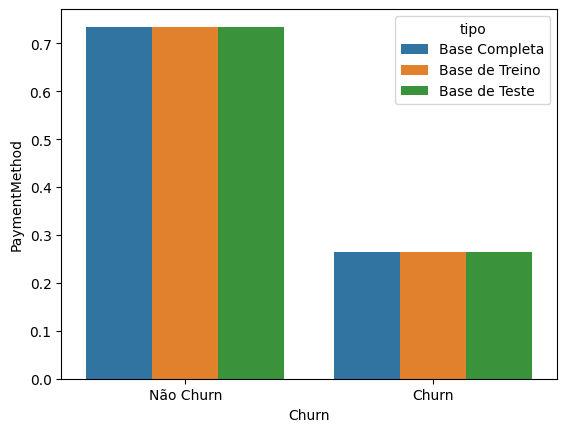

In [ ]:
df_all = dados.toPandas()
df_train = treino.toPandas()
df_test = teste.toPandas()

grouped_data = df_all.groupby(['Churn']).count()[['PaymentMethod']].reset_index()
grouped_data['tipo'] = 'Base Completa'
grouped_data['PaymentMethod'] = grouped_data['PaymentMethod']/len(df_all)

grouped_data_train = df_train.groupby(['Churn']).count()[['PaymentMethod']].reset_index()
grouped_data_train['tipo'] = 'Base de Treino'
grouped_data_train['PaymentMethod'] = grouped_data_train['PaymentMethod']/len(df_train)

grouped_data_test = df_test.groupby(['Churn']).count()[['PaymentMethod']].reset_index()
grouped_data_test['tipo'] = 'Base de Teste'
grouped_data_test['PaymentMethod'] = grouped_data_test['PaymentMethod']/len(df_test)

auxiliary_base = pd.concat([grouped_data, grouped_data_train, grouped_data_test])

sns.barplot(
    y=auxiliary_base['PaymentMethod'],
    x=auxiliary_base['Churn'], hue=auxiliary_base['tipo']
)
plt.xticks([0, 1], ['Não Churn', 'Churn'])
plt.show()

## 3.3 Relação entre Churn e Genero

Outra analise feita é sobre a relação entre o genero do cliente e a desistencia do contrato. No grafico abaixo, podemos ver que não existe diferenças evidentes entre generos.


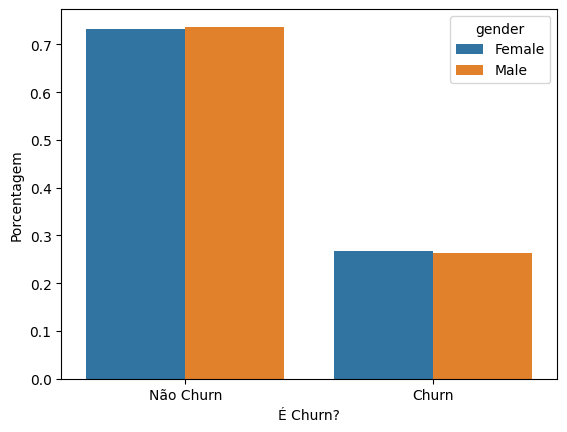

In [ ]:
grouped_data = df_train.groupby(['gender', 'Churn']).count()[['PaymentMethod']]/df_train.groupby(['gender']).count()[['PaymentMethod']]
grouped_data = grouped_data.reset_index()

sns.barplot(
    hue=grouped_data['gender'],
    y=grouped_data['PaymentMethod'],
    x=grouped_data['Churn']
)
plt.ylabel("Porcentagem")
plt.xlabel("É Churn?")
plt.xticks([0, 1], ['Não Churn', 'Churn'])
plt.show()

## 3.4 Relação entre Churn e Clientes Idosos

Outra analise, diz respeito a correlação entre clientes idosos e a desistencia do contrato. No grafico abaixo, podemos ver que a taxa de desistencia de clientes idosos é maior que outros clientes.

Essa analise deixa evidente que existe um problema na empresa que afeta especialmente cliente idosos, gerando insatisfação e consequentemente o cancelamento de contratos.

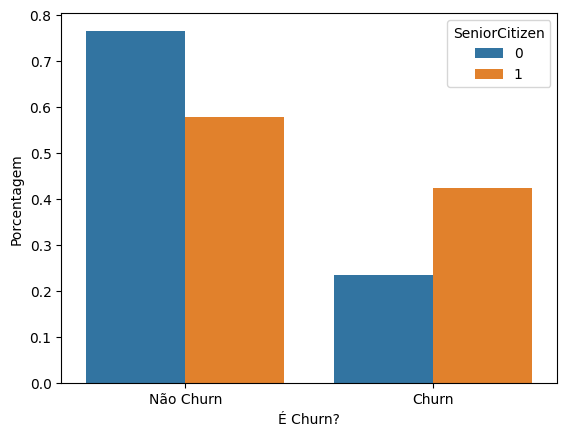

In [ ]:
grouped_data = df_train.groupby(['SeniorCitizen', 'Churn']).count()[['PaymentMethod']]/df_train.groupby(['SeniorCitizen']).count()[['PaymentMethod']]
grouped_data = grouped_data.reset_index()

sns.barplot(
    hue=grouped_data['SeniorCitizen'],
    y=grouped_data['PaymentMethod'],
    x=grouped_data['Churn']
)
plt.ylabel("Porcentagem")
plt.xlabel("É Churn?")
plt.xticks([0, 1], ['Não Churn', 'Churn'])
plt.show()

## 3.5 Relação entre Churn  e Serviços Extras

A maior incidência de churn ocorre entre aqueles que tem acesso a serviço de internet através do uso de fibra ótica.

Esse dado é um indicativo de que a internet vendida pela empresa, em especifico a de fibra otica, pode ter uma qualidade mais inferior que se comparado com outras internets, pois, os clientes que contrataram o serviço de fibra otica dessa empresa, cancelam com muita frequencia!

Cabe uma iniciativa da empresa em investigar e analisar os valores do plano, velocidades do plano e feedback dos clientes!


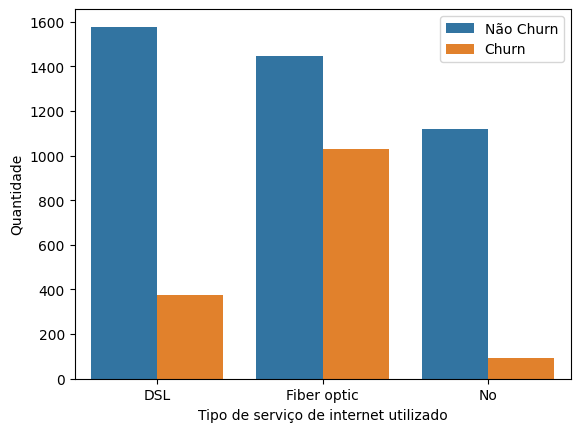

In [ ]:
grouped_data = df_train.groupby(['InternetService','Churn']).count()[['PaymentMethod']]
grouped_data = grouped_data.reset_index()
sns.barplot(
    hue=grouped_data['Churn'],
    y=grouped_data['PaymentMethod'],
    x=grouped_data['InternetService']
)
plt.ylabel("Quantidade")
plt.xlabel("Tipo de serviço de internet utilizado")
L=plt.legend()
L.get_texts()[0].set_text('Não Churn')
L.get_texts()[1].set_text('Churn')
plt.show(True)

## 3.6 Analise das Cobranças Mensais

Analisando as cobranças mensais feitas aos clientes, podemos ver que o churn fez com que os rendimentos mensais caissem em aproximadamente 30%.

Essa informação ressalta a importancia desse trabalho, como uma forma de agir antecipadamente para reter clientes e evitar a perda de clientes.

In [ ]:
print("Cobranças Mensais se não tivesse ocorrido Churn: ", df_train['MonthlyCharges'].sum(), "$")

Cobranças Mensais se não tivesse ocorrido Churn:  364844.9 $


In [ ]:
print("Cobranças Mensais Após Ocorrencia do Churn: ", df_train[df_train['Churn'] == 'No']['MonthlyCharges'].sum(), "$")

Cobranças Mensais Após Ocorrencia do Churn:  253810.95 $


In [ ]:
print("Redução dos Ganhos Mensais Devido ao Churn: ", round((1-df_train[df_train['Churn'] == 'No']['MonthlyCharges'].sum()/df_train['MonthlyCharges'].sum())*100, 2), "%")

Redução dos Ganhos Mensais Devido ao Churn:  30.43 %


In [ ]:
print(
    "Cobrança Mensal Média dos clientes que cancelaram o contrato: ",
    round(df_train[df_train['Churn'] != 'No']['MonthlyCharges'].sum()/len(df_train[df_train['Churn'] != 'No']), 2)
)

Cobrança Mensal Média dos clientes que cancelaram o contrato:  74.27


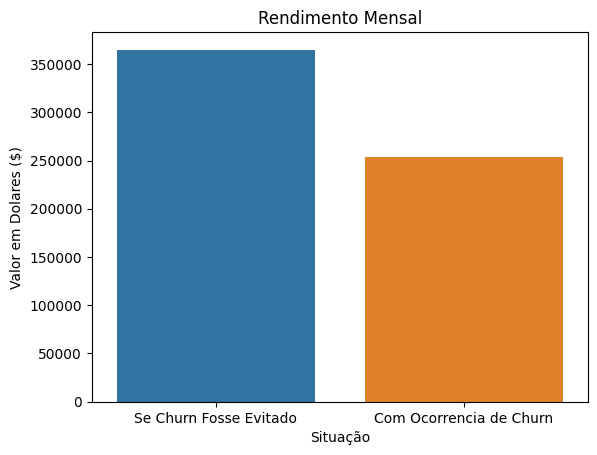

In [ ]:
sns.barplot(
    x=["Se Churn Fosse Evitado", "Com Ocorrencia de Churn"],
    y=[df_train['MonthlyCharges'].sum(), df_train[df_train['Churn'] == 'No']['MonthlyCharges'].sum()]
)
plt.xlabel("Situação")
plt.ylabel("Valor em Dolares ($)")
plt.title("Rendimento Mensal")
plt.show()

## 3.7 Analise de Dados Faltantes

A variável que possui a maior taxa de valores ausentes apresenta aproximadamente 0,12%. Sendo assim, como a volumetria é baixa não há motivo para exclusão desses dados. Sendo assim, iremos substituílos pela mediana dessa variável. Mesmo que os demais valores não apresentaram valores faltantes vamos salvar os dados do treino para possível aplicação na base de teste.

Na etapa de pré processamento realizamos a substituição desses dados faltantes, considerando a amostra de treino e teste separadamente para evitar a ocorrencia de data leakage.

In [ ]:
from pyspark.sql.functions import col, when,median,desc

In [ ]:
from pyspark.sql.functions import isnan
#calcular taxa de valores faltantes por variável
n_linhas = dados.count()
for coluna in dados.columns:
  print('A taxa de valores ausentes da variável ',coluna, 'é ', (dados.filter((col(coluna).isNull()) | (isnan(col(coluna)))).count()/n_linhas)*100,"%")




A taxa de valores ausentes da variável  customerID é  0.0 %
A taxa de valores ausentes da variável  gender é  0.0 %
A taxa de valores ausentes da variável  SeniorCitizen é  0.0 %
A taxa de valores ausentes da variável  Partner é  0.0 %
A taxa de valores ausentes da variável  Dependents é  0.0 %
A taxa de valores ausentes da variável  tenure é  0.0 %
A taxa de valores ausentes da variável  PhoneService é  0.0 %
A taxa de valores ausentes da variável  MultipleLines é  0.0 %
A taxa de valores ausentes da variável  InternetService é  0.0 %
A taxa de valores ausentes da variável  OnlineSecurity é  0.0 %
A taxa de valores ausentes da variável  OnlineBackup é  0.0 %
A taxa de valores ausentes da variável  DeviceProtection é  0.0 %
A taxa de valores ausentes da variável  TechSupport é  0.0 %
A taxa de valores ausentes da variável  StreamingTV é  0.0 %
A taxa de valores ausentes da variável  StreamingMovies é  0.0 %
A taxa de valores ausentes da variável  Contract é  0.0 %
A taxa de valores aus

## 3.8 Estatisticas Descritivas das Variaveis Continuas


In [ ]:
from pyspark.sql.types import FloatType
def alterar_tipo_coluna_float(dados, col):
  dados = dados.withColumn(col,dados[col].cast(FloatType()))
  return dados


Observe que a variável TotalCharges apresenta
valores muito maiores que os demais, por esse motivo, iremos contruir um boxplot separado para essa variável enquanto os das outras duas serão construídas no mesmo plot. Além disso, observe que o desvio padrão de todas as variáveis é grande o que indica uma alta taxa de variação entre os valores de cada variável.

In [ ]:
continuas = ['tenure', 'MonthlyCharges', 'TotalCharges']
for coluna in continuas:
    treino = alterar_tipo_coluna_float(treino, coluna)
    teste = alterar_tipo_coluna_float(teste, coluna)
treino.describe(continuas).show()

+-------+------------------+------------------+------------------+
|summary|            tenure|    MonthlyCharges|      TotalCharges|
+-------+------------------+------------------+------------------+
|  count|              5634|              5634|              5627|
|   mean| 32.29002484913028| 64.75770325435575|2282.6420919314273|
| stddev|24.538032807013746|29.979621720369586|2270.5177759568037|
|    min|               0.0|             18.25|              18.8|
|    max|              72.0|            118.75|            8684.8|
+-------+------------------+------------------+------------------+



Note-se no boxplot abaixo, que não há presença de outiliers para essas duas variáveis. É possível observar que ambas covariáveis são assimétricas (tenure a direita e MonthlyCharges a esquerda)

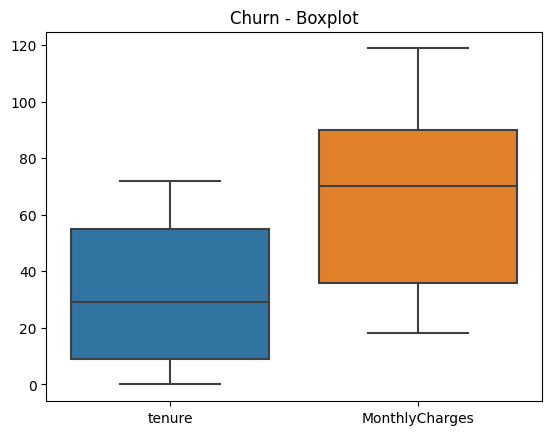

<Figure size 640x480 with 0 Axes>

In [ ]:
#visualizacao de dados
#treino = treino.toPandas()
# Criar o gráfico de boxplot com seaborn e matplotlib
sns.boxplot(data=treino.select(continuas[0:2]).toPandas())
plt.title('Churn - Boxplot')

# Remover as grades do gráfico
plt.grid(False)

# Definir o tamanho da figura
plt.figure()

# Exibir o gráfico
plt.show()

Por fim, nota-se que a variável TotalCharges não apresenta outiliers. Além disso, nota-se que ela é assimétrica a direita. Percebe-se também que a variação entre os valores maiores é maior do que entre os menores.

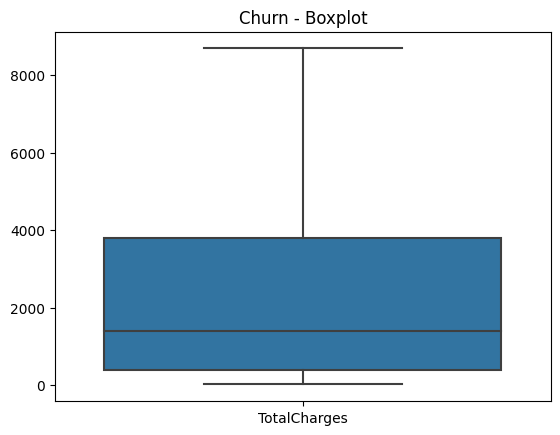

<Figure size 640x480 with 0 Axes>

In [ ]:
#visualizacao de dados
#treino = treino.toPandas()
# Criar o gráfico de boxplot com seaborn e matplotlib
sns.boxplot(data=treino.select(continuas[2]).toPandas().replace(' ', np.nan).astype(float))
plt.title('Churn - Boxplot')

# Remover as grades do gráfico
plt.grid(False)

# Definir o tamanho da figura
plt.figure()

# Exibir o gráfico
plt.show()

Observe que há uma possível correlação positiva entre as variáveis tenure e totalCharges e além disso há um aumento na variância conforme esses dois valores aumentam. Um comportamento semelhante é apresentado entre as variáveis TotalCharges e MonthlyCharges

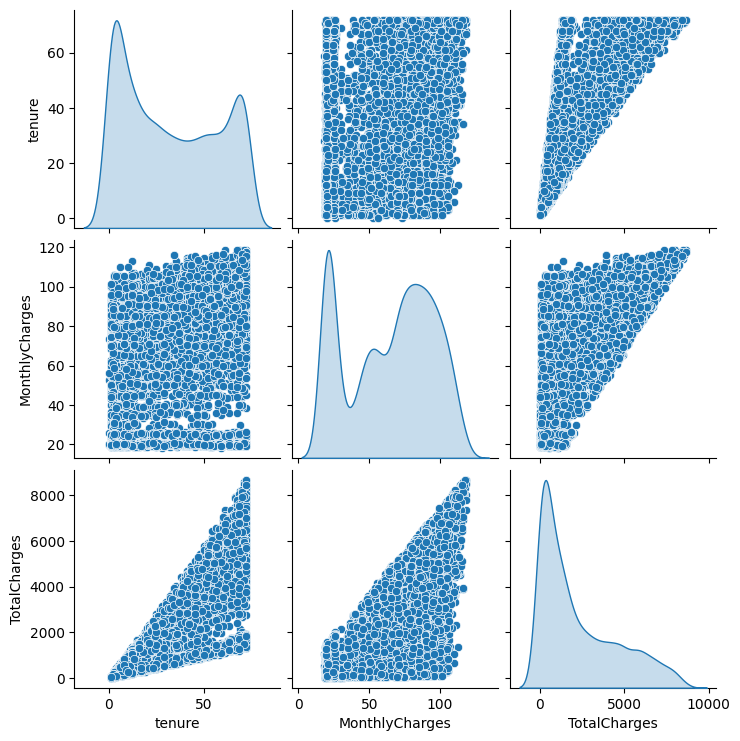

In [ ]:
sns.pairplot(treino.select(continuas).toPandas(), kind='scatter', diag_kind='kde')

plt.show()

Observe que as variáveis tenure e  TotalCharges são altamente correlacionadas e como a variável tenure possui uma correlação maior com a variável resposta iremos excluir a variável TotalCharges. Note que a variável TotalCharges também é correlacionada com a variável MonthlyCharges.

<ipython-input-25-60af6bed16fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacao = treino.select(continuas).toPandas().corr(method='spearman')


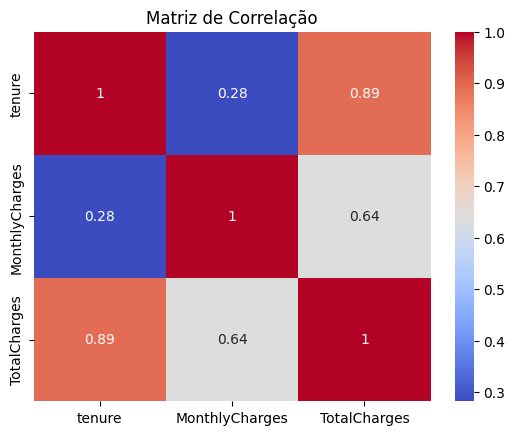

In [ ]:
continuas.append('Churn')
matriz_correlacao = treino.select(continuas).toPandas().corr(method='spearman')

# Plotando a matriz de correlação em um gráfico de heatmap
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')

plt.title('Matriz de Correlação')
plt.show()

## 3.9 Estatisticas Descritivas das Variaveis Categóricas
No caso das variáveis categóricas, vamos utilizar a correlação de cramer. Essa medida mede o nível de correlação entre variáveis categóricas. Como elas são a maioria em nossa base achamos melhor usar uma medida especifica para esse tipo de variável. A seguir ela é implementada (o código pode ser acessado em:https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix)

### 3.9.1 Frequencia das Variaveis Categorias

Primeiramente podemos analisar a proporção de cada categoria de cada variavel categorica.

Por exemplo, pudemos observar:
* 16% dos clientes são idosos
* 50,5% dos clientes são Homens
* 48% dos clientes possuem parceiros
* 30% dos clientes possuem dependentes
* 29% dos clientes contratam serviços de suporte
* ...

In [ ]:
categoricas = [var for var in treino.columns if var not in continuas and var != 'Churn' and var != 'customerID']


n_linhas_treino = treino.count()
for coluna in categoricas:
  print('\n','Representatividade por categoria da Variável ',coluna)
  treino.groupBy(coluna)\
  .count()\
  .orderBy('count')\
  .withColumn('Representabilidade(%)',(col('count')/n_linhas_treino)*100).show()


 Representatividade por categoria da Variável  gender
+------+-----+---------------------+
|gender|count|Representabilidade(%)|
+------+-----+---------------------+
|Female| 2786|    49.44976925807597|
|  Male| 2848|    50.55023074192403|
+------+-----+---------------------+


 Representatividade por categoria da Variável  SeniorCitizen
+-------------+-----+---------------------+
|SeniorCitizen|count|Representabilidade(%)|
+-------------+-----+---------------------+
|            1|  912|   16.187433439829608|
|            0| 4722|     83.8125665601704|
+-------------+-----+---------------------+


 Representatividade por categoria da Variável  Partner
+-------+-----+---------------------+
|Partner|count|Representabilidade(%)|
+-------+-----+---------------------+
|    Yes| 2705|    48.01206957756479|
|     No| 2929|    51.98793042243521|
+-------+-----+---------------------+


 Representatividade por categoria da Variável  Dependents
+----------+-----+---------------------+
|Dependent

### 3.9.2 Correlação

Nessa etapa, vamos analisar as correlações entre as covariaveis categorias. A tecnica utilizada é o teste "V de Cramér" que mede o grau de associação entre dois campos categoricos.


In [ ]:
from scipy.stats import chi2_contingency

def cramers_V(var1, var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab)
  mini = min(crosstab.shape)-1
  return (stat/(obs*mini))

In [ ]:
from sklearn import preprocessing

#seleção variáveis categóricas
cat = categoricas
cat.append("Churn")
encoders = {}  # Dicionário para armazenar os encoders e suas correspondências
data_encoded = pd.DataFrame()
data = treino.select(cat).toPandas()

for i in data.columns:
    encoder = preprocessing.LabelEncoder()
    data_encoded[i] = encoder.fit_transform(data[i])
    encoders[i] = {
        'encoder': encoder,
        'mapping': dict(zip(range(len(encoder.classes_)), encoder.classes_))
    }

In [ ]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
  rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

Considerando 0,6 como valor limite de correlação aceito, notamos que apenas duas covariáveis são altamente correlacionadas. No caso, PhoneService  e MultipleLines. Sendo assim, devemos excluir uma das duas. Como PhoneService é uma variável com uma quantidade menor de categorias ela será escolhida para ficar no modelo. Dessa forma, a varipável MultipleLines será excluída.

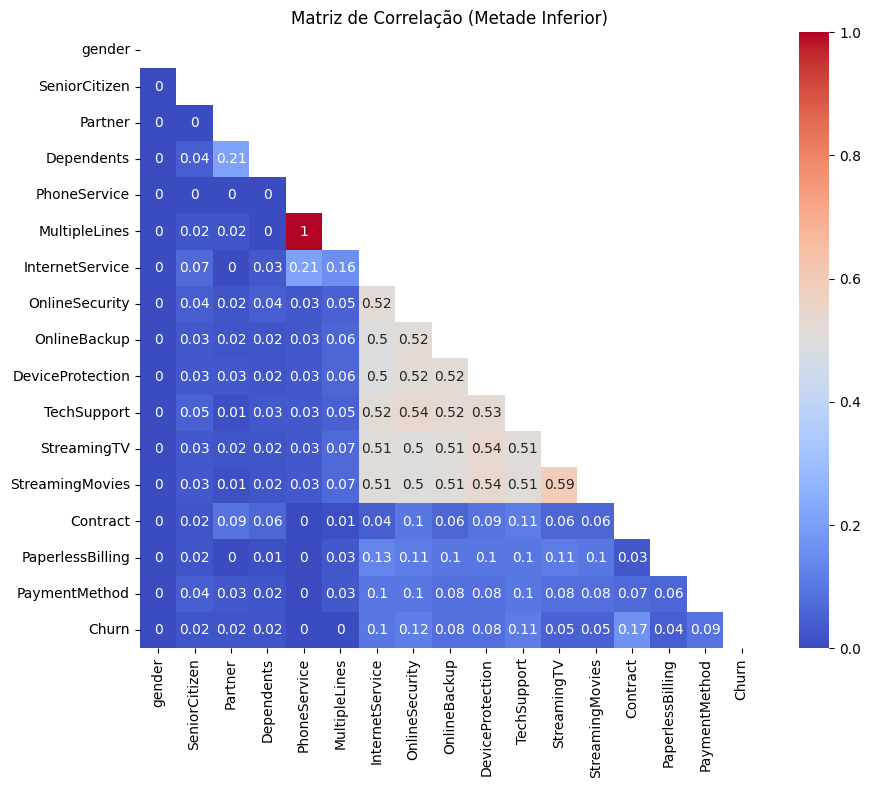

In [ ]:
# Criando uma máscara triangular inferior
mask = np.triu(np.ones_like(df, dtype=bool))

# Ajustando o tamanho da figura
plt.figure(figsize=(10, 8))

# Plotando a matriz de correlação em um gráfico de heatmap com a metade inferior oculta
sns.heatmap(df, mask=mask, annot=True, cmap='coolwarm')

plt.title('Matriz de Correlação (Metade Inferior)')
plt.show()


# 4. Pré-processamento dos dados

Nessa etapa, vamos realizar as seguintes etapas de processamento dos dados:

* Exclusão de Covariaveis
* Conversão de Covariaveis Categoricas
* Imputar dados Faltantes

As etapas serão realizadas separadamente na base de treino e teste com o intuito de evitar o vazamento de dados.

## 4.1 Exclusão de Covariaveis

Confome já destacado a variável resposta do problema é Churn. Além disso, não utilizaremos a coluna custumerID já que ela traz apenas o ID do cliente e não será usada como covariável dos modelos.

In [ ]:
treino = treino.drop('customerID')
teste = teste.drop('customerID')


Remoção da coluna TotalCharges e MultipleLines, devido a existencia de correlação com outras

In [ ]:
#exclusão variável TotalCharges
treino = treino.drop('TotalCharges')
teste = teste.drop('TotalCharges')

#Excluindo a covariável MultipleLines
treino = treino.drop('MultipleLines')
teste = teste.drop('MultipleLines')

## 4.2 Conversão de Variaveis Categóricas

Note que o tipo de dados de algumas colunas foi indicado errado, "Churn","Partner", "Dependents", "PhoneService" e "PaperlessBilling" deveriam ser indicadoras (1 ou 0) para facilitar a construção dos modelos.

In [ ]:
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import when,col,sum
#função que altera Yes e No para 1 e 0 e além disso, coloca a coluna como Integer
def alterar_tipo_coluna(col,dados):
  dados = dados.withColumn(col, when(dados[col] == 'Yes',1)
                         .when(dados[col] == 'No',0)
                         .otherwise(dados[col]))
  dados = dados.withColumn(col,dados[col].cast(IntegerType()))
  return dados

In [ ]:
#alterando o tipo de dados de algumas colunas
treino = alterar_tipo_coluna('Churn',treino)
treino = alterar_tipo_coluna('Partner',treino)
treino = alterar_tipo_coluna('Dependents',treino)
treino = alterar_tipo_coluna('PhoneService',treino)
treino = alterar_tipo_coluna('PaperlessBilling',treino)


teste = alterar_tipo_coluna('Churn',teste)
teste = alterar_tipo_coluna('Partner',teste)
teste = alterar_tipo_coluna('Dependents',teste)
teste = alterar_tipo_coluna('PhoneService',teste)
teste = alterar_tipo_coluna('PaperlessBilling',teste)


## 4.3 Imputando Covariaveis com Dados Faltantes

Calculando mediana e moda das variáveis na base de treino para substituir, se necessário, os valores faltantes e outliers.

In [ ]:
from pyspark.sql.functions import col, when,median,desc
# Lista das variáveis que terão a mediana calculada
continuas = ['tenure', 'MonthlyCharges']

# media excluindo Na
mediana_dict = {}
#moda excluindo Na
moda_dict = {}

# Itere sobre as colunas e calcule a mediana ignorando Na
for coluna in continuas:
    mediana_dict[coluna] = treino.select(['Churn',coluna]).na.drop().agg(median(col(coluna))).first()[0]

# Crie um novo DataFrame com as medianas
mediana_df = spark.createDataFrame([mediana_dict])

# demais variáveis (exceto 'Churn')
categoricas = [var for var in treino.columns if var not in continuas and var != 'Churn']

# Itere sobre as colunas e calcule a moda ignorando Na
for coluna in categoricas:
    moda_dict[coluna] = treino.select(['Churn',coluna]).na.drop().groupBy(coluna).count().orderBy(col('count').desc()).first()[0]

# Crie um novo DataFrame com as modas
moda_df = spark.createDataFrame([moda_dict])

# Exibe os resultados
mediana_df.show()
moda_df.show()


+-----------------+------+
|   MonthlyCharges|tenure|
+-----------------+------+
|70.30000305175781|  29.0|
+-----------------+------+

+--------------+----------+----------------+---------------+------------+--------------+----------------+-------+----------------+------------+-------------+---------------+-----------+-----------+------+
|      Contract|Dependents|DeviceProtection|InternetService|OnlineBackup|OnlineSecurity|PaperlessBilling|Partner|   PaymentMethod|PhoneService|SeniorCitizen|StreamingMovies|StreamingTV|TechSupport|gender|
+--------------+----------+----------------+---------------+------------+--------------+----------------+-------+----------------+------------+-------------+---------------+-----------+-----------+------+
|Month-to-month|         0|              No|    Fiber optic|          No|            No|               1|      0|Electronic check|           1|            0|             No|         No|         No|  Male|
+--------------+----------+----------------+

In [ ]:
#tratar valores faltantes
#colunas com variaveis continuas
for coluna in continuas:
  treino = treino.na.fill(mediana_df.select(coluna).first()[0],subset = [coluna])
  teste = teste.na.fill(mediana_df.select(coluna).first()[0],subset = [coluna])

#substituindo a moda nas categoricas
for coluna in categoricas:
  treino = treino.na.fill(moda_df.select(coluna).first()[0],subset = [coluna])
  teste = teste.na.fill(moda_df.select(coluna).first()[0],subset = [coluna])

# 5. Criação e Teste de Diversos Modelos

Após as etapas de analise exploratoria e processamento de dados, começaremos a modelar o problema com as tecnicas de aprendizado de maquina.

Para facilitar a exploração de modelos, foi feito o uso do PyCaret que testa diversas tecnicas para a mesma base de dados.

Criando a sessão no pycaret, setando a semeste para os resultados serem reproduzíveis e selecionando 10 folds. Os folds servem para realização da validação cruzada que ajuda a evitar overfitting nos modelos.

In [ ]:
# importanto pycaret classificador e iniciando o setup
from pycaret.classification import *
treino = treino.toPandas()
teste = teste.toPandas()
#a validacao cruzada será realizada com 5 folds
s = setup(treino, target = 'Churn', session_id = 1910,fold =10, test_data=teste, index=False)

,Description,Value
0,Session id,1910
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 18)"
4,Transformed data shape,"(7043, 37)"
5,Transformed train set shape,"(5634, 37)"
6,Transformed test set shape,"(1409, 37)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,10


A seguir são gerados diversos modelos e comparadas algumas métricas de desempenho.

In [ ]:
# ajuste e comparacao dos modelos (ordenação por F1 score)
best = compare_models(sort = 'F1',cross_validation = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8021,0.8402,0.5397,0.6547,0.5912,0.4623,0.4663,1.4810
nb,Naive Bayes,0.6867,0.8143,0.8468,0.4523,0.5894,0.3721,0.4204,0.6990
lda,Linear Discriminant Analysis,0.7968,0.8364,0.5458,0.6382,0.5880,0.4542,0.4569,0.4660
ada,Ada Boost Classifier,0.7950,0.8415,0.5189,0.6412,0.5732,0.4403,0.4448,0.8520
ridge,Ridge Classifier,0.8008,0.0000,0.4983,0.6681,0.5704,0.4443,0.4527,0.2230
catboost,CatBoost Classifier,0.7953,0.8357,0.5123,0.6449,0.5704,0.4385,0.4438,5.6000
lightgbm,Light Gradient Boosting Machine,0.7920,0.8307,0.5137,0.6349,0.5673,0.4324,0.4370,0.6370
gbc,Gradient Boosting Classifier,0.7966,0.8442,0.5010,0.6546,0.5666,0.4368,0.4441,1.7090
xgboost,Extreme Gradient Boosting,0.7806,0.8195,0.5130,0.6029,0.5537,0.4096,0.4123,1.7390
qda,Quadratic Discriminant Analysis,0.5811,0.8292,0.9432,0.3847,0.5453,0.2698,0.3679,0.2990


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Para seleção dos modelos, decidimos optar pela métrica F1-score essa métrica consiste na média harmônica entre o precision e o recall. Acreditamos que essa métrica consegue trazer mais infomação para o desempenho do modelo do que a acurácia. A seguir os são mostrados os parâmetros dos três melhores modelos. Bem como o desempenho deles em cada um dos 10 folds.

In [ ]:
#naive bayes
nb = create_model('nb')
nb

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7181,0.8375,0.8533,0.4830,0.6169,0.4198,0.4625
1,0.6755,0.8118,0.8267,0.4413,0.5754,0.3500,0.3954
2,0.7181,0.8437,0.8467,0.4829,0.6150,0.4178,0.4589
3,0.7057,0.8266,0.9067,0.4722,0.6210,0.4172,0.4769
4,0.6732,0.7889,0.7987,0.4359,0.5640,0.3369,0.3766
5,0.6590,0.8103,0.8456,0.4271,0.5676,0.3330,0.3864
6,0.6661,0.8037,0.8389,0.4325,0.5708,0.3404,0.3908
7,0.6856,0.8107,0.8859,0.4521,0.5986,0.3821,0.4410
8,0.6945,0.8169,0.8591,0.4588,0.5981,0.3864,0.4362


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#regressao logistica
lr = create_model('lr')
lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8156,0.8526,0.5933,0.6742,0.6312,0.5089,0.5108
1,0.8191,0.8500,0.5933,0.6846,0.6357,0.5162,0.5186
2,0.8404,0.8744,0.5800,0.7632,0.6591,0.5574,0.5664
3,0.7926,0.8506,0.5400,0.6279,0.5806,0.4439,0.4461
4,0.7904,0.8215,0.4832,0.6372,0.5496,0.4164,0.4231
5,0.8028,0.8352,0.5302,0.6583,0.5874,0.4598,0.4645
6,0.8011,0.8399,0.5570,0.6434,0.5971,0.4660,0.4681
7,0.7762,0.8246,0.5101,0.5891,0.5468,0.3992,0.4010
8,0.7957,0.8436,0.5168,0.6417,0.5725,0.4403,0.4448


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1910, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#linear discriminant analyses
lda = create_model('lda')
lda

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8103,0.8480,0.5867,0.6617,0.6219,0.4959,0.4975
1,0.8191,0.8448,0.5867,0.6875,0.6331,0.5141,0.5169
2,0.8369,0.8686,0.5733,0.7544,0.6515,0.5476,0.5564
3,0.7801,0.8503,0.5267,0.5985,0.5603,0.4145,0.4160
4,0.7940,0.8151,0.5101,0.6387,0.5672,0.4342,0.4389
5,0.7940,0.8344,0.5503,0.6260,0.5857,0.4494,0.4510
6,0.7993,0.8361,0.5638,0.6364,0.5979,0.4648,0.4663
7,0.7709,0.8205,0.5101,0.5758,0.5409,0.3890,0.3903
8,0.7886,0.8403,0.5369,0.6154,0.5735,0.4338,0.4356


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

# 6. Ajuste de Hiperparametros

Neste tópico, iremos tunar os hiperparâmetros dos três modelos selecionados visando um melhor desempenho na métrica do F1-score. Bem como fazer uma análise mais aprofundada sobre os modelos, verificando matriz de confusão, KS2,etc

In [ ]:
#nb
nb = tune_model(nb,choose_better= True, optimize='F1')
#gerador de um painel iterativo com diversas métricas do modelo
evaluate_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7181,0.8375,0.8533,0.4830,0.6169,0.4198,0.4625
1,0.6755,0.8117,0.8267,0.4413,0.5754,0.3500,0.3954
2,0.7181,0.8437,0.8467,0.4829,0.6150,0.4178,0.4589
3,0.7057,0.8266,0.9067,0.4722,0.6210,0.4172,0.4769
4,0.6732,0.7889,0.7987,0.4359,0.5640,0.3369,0.3766
5,0.6590,0.8103,0.8456,0.4271,0.5676,0.3330,0.3864
6,0.6661,0.8037,0.8389,0.4325,0.5708,0.3404,0.3908
7,0.6856,0.8107,0.8859,0.4521,0.5986,0.3821,0.4410
8,0.6945,0.8169,0.8591,0.4588,0.5981,0.3864,0.4362


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Na aba AUC são apresentas as curvas ROC para cada uma das classes do modelo. Observe que as curvas das classes estão bem próximas e elas apresentam um resultado semelhante de AUC.

Já na aba Confusion Matrix pode-se acessar a matriz de confusão do modelo. Note que há maior parte dos erros observados está em dizer que um cliente vai cancelar o produto quando na verdade ele não cancelou. Pensando no problema de Churn isso é bom, pois é possível criar estratégias para retenção de clientes focados principalmente nesse grupo.

Na aba Threshold é possível verificar qual é o score do modelo (baseado em diversas métricas) conforme o ponto de corte é alterado (a partir de qual probablidade o cliente é considerado mau). Nota-se nesse caso que para o F1 score houve uma certa estabilidade da métrica mesmo com as alterações dos cortes.

A aba Class report apresenta uma comparação de classe entre as métricxas precision, recall e f1 score. Observe que no geral, o problema está em dizer que o cliente é churn quando na verdade ele não é, ou seja, o modelo está sendo conservador.

Na aba learnning curve é possível observar que o modelo não apresenta overfiting visto que o desempenho no treino e na validação não é tão distante.

Na aba KS statistic plot é apresentada a curva do k2, essa métrica consiste em pegar a máxima diferença (em módulo) entre a distribuição acumulada das duas classes. Basicamente, quanto maior ela for melhor. O resultado obtido aqui foi de 0.49

In [ ]:
#regressao logistica
lr = tune_model(lr,choose_better= True, optimize='F1')
#gerador de um painel iterativo com diversas métricas do modelo
evaluate_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7660,0.8522,0.8067,0.5402,0.6471,0.4821,0.5038
1,0.7376,0.8500,0.8133,0.5041,0.6224,0.4379,0.4673
2,0.7855,0.8741,0.8000,0.5687,0.6648,0.5136,0.5298
3,0.7447,0.8512,0.8133,0.5126,0.6289,0.4491,0.4770
4,0.7549,0.8213,0.7517,0.5258,0.6188,0.4464,0.4618
5,0.7318,0.8339,0.7987,0.4958,0.6118,0.4236,0.4517
6,0.7300,0.8384,0.8121,0.4939,0.6142,0.4249,0.4561
7,0.7336,0.8241,0.8255,0.4980,0.6212,0.4345,0.4676
8,0.7584,0.8441,0.7852,0.5294,0.6324,0.4625,0.4824


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Note que o AUC da regressão logística é maior do que o anterior. Ao observar a matriz de confusão (aba confusion Matrix) percebe-se que o modelo é menos conservador que o anterior, isto é, ele permite um erro maior em predizer quem são os clientes churn em troca de acertar mais os que não são. O Ks (aba KS Statistic Plot) está em 0.51 que é maior do que o resultado do modelo anterior, isto significa que ele consegue separar melhor as classes. O theshold escolhido para esse modelo é menor do que o do anterior, isto é, a probabilidade necessária pra predizer que um cliente é churn é menor. O interessante disso é que apesar dele ter esse comportamento a quantidade de chruns preditos é menor, essa situação é interessante para verificar como os modelos trabalham de maneiras diferentes. Na aba Decision Boundary fica evidente a dificuldade do problema. Note que há diversos valores de classes diferentes se sobrepondo.

In [ ]:
#linear discriminant
lda = tune_model(lda,choose_better= True, optimize='F1')
#gerador de um painel iterativo com diversas métricas do modelo
evaluate_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8067,0.8483,0.5800,0.6541,0.6148,0.4865,0.4880
1,0.8174,0.8440,0.5733,0.6880,0.6255,0.5060,0.5097
2,0.8387,0.8682,0.5800,0.7565,0.6566,0.5535,0.5619
3,0.7784,0.8500,0.5267,0.5940,0.5583,0.4111,0.4124
4,0.7957,0.8149,0.5101,0.6441,0.5693,0.4378,0.4429
5,0.7940,0.8336,0.5503,0.6260,0.5857,0.4494,0.4510
6,0.8011,0.8365,0.5638,0.6412,0.6000,0.4683,0.4701
7,0.7673,0.8213,0.5034,0.5682,0.5338,0.3795,0.3808
8,0.7957,0.8405,0.5436,0.6328,0.5848,0.4504,0.4527


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Ao observar a matriz de confusão o modelo de linear discriminat (aba Confusion Matrix) fica evidente que o modelo acertou mais que não é churn do que os outros dois ao custo de errar quem é churn. Pensando no problema talvez isso não seja uma boa ideia visto que o core do negócio seria criar estratégias não virarem churn. Porém, mesmo assim esse modelo pode ser útil ao compolo com outro(s) por meio de um blend já que ele traz análises diferentes. O ks do modelo apresenta valores próximos da regressão logística. Note que a área predita como churn diminui bastabnte em comparação com a regressão logística (aba Decision Boundary)

Realização do blend:

In [ ]:
blend = blend_models([nb,lr,lda], method = 'hard',fold = 10)
blend

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7660,0.0000,0.7933,0.5409,0.6432,0.4782,0.4976
1,0.7376,0.0000,0.8067,0.5042,0.6205,0.4358,0.4640
2,0.7872,0.0000,0.7933,0.5721,0.6648,0.5149,0.5296
3,0.7500,0.0000,0.8133,0.5191,0.6338,0.4577,0.4843
4,0.7531,0.0000,0.7248,0.5243,0.6085,0.4349,0.4470
5,0.7336,0.0000,0.7919,0.4979,0.6114,0.4243,0.4508
6,0.7318,0.0000,0.8054,0.4959,0.6138,0.4257,0.4551
7,0.7425,0.0000,0.8188,0.5083,0.6272,0.4465,0.4761
8,0.7655,0.0000,0.7852,0.5392,0.6393,0.4744,0.4928


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Naive Bayes',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('Logistic Regression',
                              LogisticRegression(C=3.926,
                                                 class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1910,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Linear Discriminant Analysis',
                              LinearDiscriminantAnalysis(covariance_estimator=None,
                                                         n_components=None,
                                                         priors=None,
                                                         shrinkage=None,
                                                         solver='svd',
                                                         store_covariance=False,
                                                         tol=0.0001))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='hard', weights=None)

Note que os resultados do blend entre os modelos não foi promissor, usando a ideia da votação. Sendo assim, vamos seguir com os modelos separados mesmo já que eles tem um desempenho melhor.

# 7. Validação na Base de Teste

Agora ajustaremos os 3 melhores modelos à base de teste e verificaremos qual possui melhor métrica F1. Será nosso critério para definir o melhor modelo para predição de Churn. Além disso, plotaremos as matrizes confusão para cada um dos modelos afim de enriquecer a análise.

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6962,0.8347,0.8610,0.4613,0.6007,0.3898,0.4395


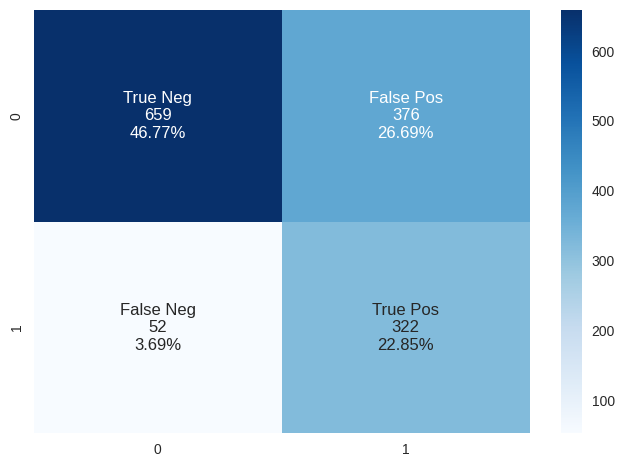

In [ ]:
y_predict_nb = predict_model(nb, data = teste.loc[:,treino.columns])

cm = confusion_matrix(y_predict_nb['Churn'],y_predict_nb['prediction_label'])

# Plotar matriz de confusão
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

Notamos que esse modelo tem baixa taxa de erro (3.69%) referente ao "não Churn". É um indicador importante para avaliar se modelo tem boa capacidade de aplicação para o problema de negócio da empresa.

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7615,0.8535,0.8155,0.5332,0.6448,0.4769,0.5013


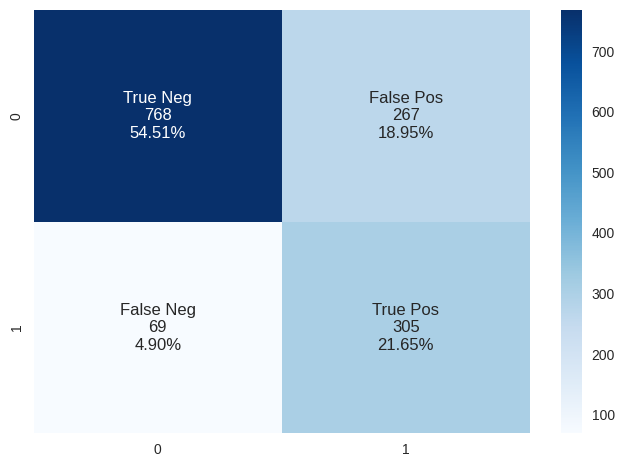

In [ ]:
y_predict_lr = predict_model(lr, data = teste.loc[:,treino.columns])

cm = confusion_matrix(y_predict_lr['Churn'],y_predict_lr['prediction_label'])

# Plotar matriz de confusão
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

Novamente notamos uma baixa de taxa de erro(4.97%) em relação ao "não Churn". Além disso, apresenta a melhor métrica F1 entre os modelos selecionados.

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8070,0.8529,0.5882,0.6509,0.6180,0.4893,0.4904


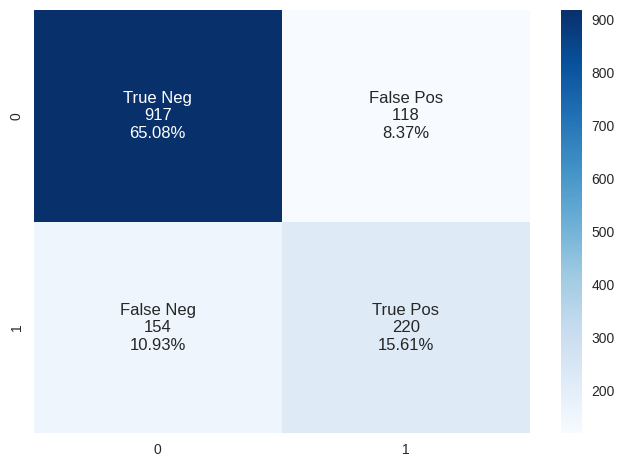

In [ ]:
y_predict_lda = predict_model(lda, data = teste.loc[:,treino.columns])

cm = confusion_matrix(y_predict_lda['Churn'],y_predict_lda['prediction_label'])

# Plotar matriz de confusão
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

Apresenta a maior taxa de erro referente ao "não Churn" apesar de ter métrica F1 maior do que a do modelo de Naive Bayes.

Diante disso, decidimos pelo modelo de regressão logística como melhor escolha para prevenção de Churn após os ajustes. Porém, daremos continuidade a investigação com o intuito de tentar encontrar um modelo que tenha melhor ajuste e melhores métricas. Segue abaixo nosso estudo com as redes neurais.

# 8. Redes Neurais

Não é de hoje que as pessoas têm optado por utilizar redes neurais ao invés de clássicos algoritmos de aprendizado de máquina para problemas de classificação. Com os avanços de hardware, essa opção tem se popularizado cada vez mais.

Diante disso foi decidido criar um modelo de rede neural não tão complexo e que seja tão competitivo em termos de desempenho, avaliado a partir de métricas, quando comparada com os outros modelos feitos neste projeto.

Para a construção desta rede neural, foi utilizado o framework PyTorch.

A arquitetura da rede é simples e consiste em várias camadas totalmente conectadas. A função de ativação utilizada em todas as camadas, exceto na última, é a tangente hiperbólica (Tanh), enquanto na última camada é utilizada a função sigmoid para realizar a classificação binária.

Além disso, as camadas lineares possuem a seguinte configuração de número de neurônios de entrada e saída:

*  A primeira camada linear (fc1) possui um número de neurônios de entrada correspondente ao tamanho da dimensão de entrada especificada durante a inicialização do modelo, e um número de neurônios de saída igual a 128.

*  A segunda camada linear (fc2) possui 128 neurônios de entrada e 128 neurônios de saída.

*  A terceira camada linear (fc3) possui 128 neurônios de entrada e 128 neurônios de saída.

*  A quarta camada linear (fc4) possui 128 neurônios de entrada e 64 neurônios de saída.

*  A quinta camada linear (fc5) possui 64 neurônios de entrada e 32 neurônios de saída.

*  A sexta camada linear (fc6) possui 32 neurônios de entrada e 16 neurônios de saída.

*  A sétima camada linear (fc7) possui 16 neurônios de entrada e 8 neurônios de saída.

*  A oitava camada linear (fc8) possui 8 neurônios de entrada e 4 neurônios de saída.

*  A nona e última camada linear (fc9) possui 4 neurônios de entrada e 1 neurônio de saída.

Vale destacar que a taxa de aprendizado foi de 0.0001, o otimizador foi o Adam, a função de perda foi o BCELoss e a rede foi treinada por 1000 épocas e o modelo final foi escolhido a partir de uma métrica "Score" calculada durante as épocas

Vale destacar que durante o treinamento da rede neural, foram utilizados os seguintes hiperparâmetros:

*  Taxa de aprendizado: 0.0001
*  Otimizador: Adam (um algoritmo popular de otimização)
*  Função de perda: BCELoss (Binary Cross Entropy Loss), adequada para problemas de classificação binária.
*  Número de épocas de treinamento: 1000


Durante o treinamento, uma métrica chamada "Score" foi calculada em cada época para avaliar o desempenho do modelo. Com base nessa métrica, o modelo final foi escolhido.


## Preparando o ambiente e os dados

In [ ]:
#Lembrar de trocar o ambiente de execução do colab para GPU ao invés de CPU
#Antes de rodar o código
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

torch.manual_seed(124)

cuda


In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = df.drop('TotalCharges', axis=1)
df = df.drop('customerID', axis=1)
df = df.drop('MultipleLines', axis=1)
mapping = {'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1}
df = df.replace(mapping)

y = df['Churn'].values
df = df.drop('Churn', axis=1)
df = pd.get_dummies(df)
X = df.values

# Normalização
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
#90% treino+validacao  e 10% teste
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#80% treino e 10% validação
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

#Transformando em tensor
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val = torch.tensor(y_val, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)


#Criando os datasets

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

# Crie o DataLoader para iterar sobre o conjunto de treinamento em lotes
batch_size = 128 # Defina o tamanho do lote desejado


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


## Rede Neural

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.Ativacao1 = nn.Tanh()

        self.fc2 = nn.Linear(128,128)
        self.Ativacao2 = nn.Tanh()

        self.fc3 = nn.Linear(128, 128)
        self.Ativacao3 = nn.Tanh()

        self.fc4 = nn.Linear(128, 64)
        self.Ativacao4 = nn.Tanh()

        self.fc5= nn.Linear(64, 32)
        self.Ativacao5 = nn.Tanh()

        self.fc6= nn.Linear(32, 16)
        self.Ativacao6 = nn.Tanh()

        self.fc7= nn.Linear(16, 8)
        self.Ativacao7 = nn.Tanh()

        self.fc8= nn.Linear(8, 4)
        self.Ativacao8 = nn.Tanh()

        self.fc9 = nn.Linear(4, 1)
        self.Ativacao9 = nn.Sigmoid()

        self.drop=nn.Dropout(p=0.2)
    def forward(self, x):
        x = self.Ativacao1(self.fc1(x))
        x = self.drop(x)
        x = self.Ativacao2(self.fc2(x))
        x = self.drop(x)
        x = self.Ativacao3(self.fc3(x))
        x = self.drop(x)
        x = self.Ativacao4(self.fc4(x))
        x = self.drop(x)
        x = self.Ativacao5(self.fc5(x))
        x = self.drop(x)
        x = self.Ativacao6(self.fc6(x))
        x = self.drop(x)
        x = self.Ativacao7(self.fc7(x))
        x = self.drop(x)
        x = self.Ativacao8(self.fc8(x))
        x = self.drop(x)
        x = self.Ativacao9(self.fc9(x))

        return x


## Treinamento

Hiperparâmetros

In [ ]:
input_dim = X_train.shape[1]
learning_rate = 0.0001
n_epochs = 1000
Score = 0

model = MLP(input_dim)
model = model.to(device)
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Treinamento e exposição das métricas de desempenho

In [ ]:
Train_Loss = []
Valid_Loss = []
Valid_acc =[]
BEST = 0

# Loop de treinamento
for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    Score_train = 0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        labels = labels.reshape(-1, 1)

        # Forward pass
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        # Backward pass e otimização dos pesos
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)


    # Calcular a perda média do treinamento
    train_loss /= len(train_loader.dataset)
    Train_Loss.append(train_loss)

    # Avaliar o desempenho no conjunto de validação
    model.eval()  # Colocar o modelo no modo de avaliação
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = loss_fn(val_outputs, y_val.view(-1, 1))
        val_accuracy = ((val_outputs >= 0.5).squeeze().float() == y_val).float().mean()

    Valid_Loss.append(val_loss)
    Valid_acc.append(val_accuracy)
    # Imprimir as métricas de treinamento e validação
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    Score_train = (val_accuracy/val_loss)

    #Salvar o melhor modelo com base no Score
    if Score_train > Score:
      Score = Score_train
      torch.save(model.state_dict(), '/content/modelo_z_x.pt')
      BEST = epoch + 1


## Métricas do modelo
model.eval()  # Colocar o modelo no modo de avaliação
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = loss_fn(test_outputs, y_test.view(-1, 1))
    test_accuracy = ((test_outputs >= 0.5).squeeze().float() == y_test).float().mean()

    # Ajuste do threshold para aumentar o recall
    new_threshold = 0.35
    predicted_labels = (test_outputs >= new_threshold).squeeze().cpu().numpy()
    precision = precision_score(y_test.cpu().numpy(), predicted_labels)
    recall = recall_score(y_test.cpu().numpy(), predicted_labels)
    f1 = f1_score(y_test.cpu().numpy(), predicted_labels)

    # Cálculo do AUC
    y_scores = test_outputs.squeeze().cpu().numpy()  # Probabilidades das classes positivas
    auc = roc_auc_score(y_test.cpu().numpy(), y_scores)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


Epoch 50/1000, Train Loss: 0.4850, Val Loss: 0.4748, Val Accuracy: 0.7918
Epoch 100/1000, Train Loss: 0.4608, Val Loss: 0.4421, Val Accuracy: 0.7918
Epoch 150/1000, Train Loss: 0.4438, Val Loss: 0.4278, Val Accuracy: 0.7918
Epoch 200/1000, Train Loss: 0.4367, Val Loss: 0.4250, Val Accuracy: 0.7902
Epoch 250/1000, Train Loss: 0.4337, Val Loss: 0.4205, Val Accuracy: 0.7839
Epoch 300/1000, Train Loss: 0.4301, Val Loss: 0.4162, Val Accuracy: 0.7871
Epoch 350/1000, Train Loss: 0.4318, Val Loss: 0.4183, Val Accuracy: 0.7918
Epoch 400/1000, Train Loss: 0.4262, Val Loss: 0.4172, Val Accuracy: 0.7918
Epoch 450/1000, Train Loss: 0.4199, Val Loss: 0.4201, Val Accuracy: 0.7934
Epoch 500/1000, Train Loss: 0.4167, Val Loss: 0.4188, Val Accuracy: 0.7934
Epoch 550/1000, Train Loss: 0.4158, Val Loss: 0.4211, Val Accuracy: 0.7902
Epoch 600/1000, Train Loss: 0.4155, Val Loss: 0.4232, Val Accuracy: 0.7950
Epoch 650/1000, Train Loss: 0.4143, Val Loss: 0.4244, Val Accuracy: 0.7950
Epoch 700/1000, Train Loss

## Gráficos de perda e acurácia do treinamento

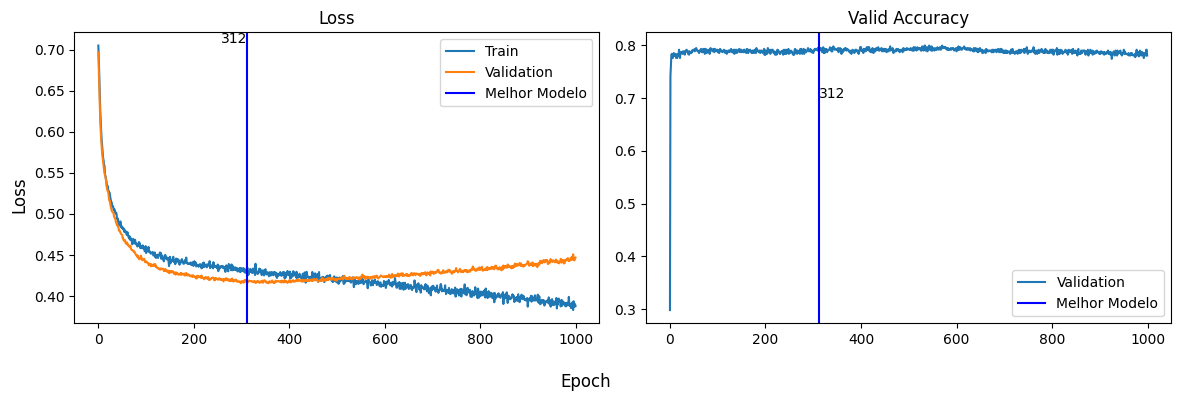

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

valid_loss_cpu = [loss.cpu() for loss in Valid_Loss]
valid_acc_cpu = [acc.cpu().numpy() for acc in Valid_acc]

ax[0].title.set_text("Loss")
ax[0].plot(np.arange(len(Train_Loss)), Train_Loss, label = 'Train')
ax[0].plot(np.arange(len(valid_loss_cpu)), valid_loss_cpu, label='Validation')
ax[0].axvline(BEST,color = 'b', label = 'Melhor Modelo')
ax[0].text(BEST, ax[0].get_ylim()[1], str(BEST), ha='right', va='top')

ax[0].legend()

ax[1].title.set_text("Valid Accuracy")
ax[1].plot(np.arange(len(valid_acc_cpu)), valid_acc_cpu, label='Validation')
ax[1].axvline(BEST,color = 'b', label = 'Melhor Modelo')
ax[1].text(BEST, ax[0].get_ylim()[1], str(BEST), ha='left', va='top')

ax[1].legend()


fig.supxlabel('Epoch')
fig.supylabel('Loss')
fig.tight_layout()

fig.show()


## Exposição da métrica do melhor modelo

In [ ]:
model.load_state_dict(torch.load('modelo_z_x.pt'))
model = model.to(device)

In [ ]:
## Métricas do modelo
model.eval()  # Colocar o modelo no modo de avaliação
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = loss_fn(test_outputs, y_test.view(-1, 1))
    test_accuracy = ((test_outputs >= 0.5).squeeze().float() == y_test).float().mean()

    # Ajuste do threshold
    new_threshold = 0.35
    predicted_labels = (test_outputs >= new_threshold).squeeze().cpu().numpy()
    precision = precision_score(y_test.cpu().numpy(), predicted_labels)
    recall = recall_score(y_test.cpu().numpy(), predicted_labels)
    f1 = f1_score(y_test.cpu().numpy(), predicted_labels)

    # Cálculo do AUC
    y_scores = test_outputs.squeeze().cpu().numpy()  # Probabilidades das classes positivas
    auc = roc_auc_score(y_test.cpu().numpy(), y_scores)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


Test Loss: 0.4068, Test Accuracy: 0.8142
Precision: 0.6323, Recall: 0.7268, F1-score: 0.6763
AUC: 0.8648


## Comentários sobre a rede neural

Apesar de ser um problema bastante complexo e a rede neural ser bem simples, teve um ajuste consideravelmente melhor para esses dados. Possuindo métricas excelentes se comparadas com os demais modelos.

Foram feitos vários testes com diferentes arquiteturas e hiperparâmetros mas os resultados não mostraram diferenças realmente significativas.

# 9. Conclusão

Em conclusão, este trabalho de aprendizado de máquina buscou aprimorar a classificação de churn por meio da exploração de diferentes modelos utilizando a biblioteca PyCaret. Os resultados obtidos foram altamente competitivos, apresentando métricas favoráveis em vários modelos testados. No entanto, uma rede neural fully connected se destacou, demonstrando um desempenho superior em termos de métricas de avaliação.

É importante ressaltar que, embora essa abordagem tenha demonstrado maior eficácia em termos de precisão, ela possui uma limitação em relação à interpretabilidade quando comparada aos outros modelos utilizados. Portanto, ao considerar a abordagem a ser adotada em um projeto relacionado ao churn, é necessário ponderar as necessidades e objetivos específicos, levando em conta fatores como a capacidade de interpretação dos resultados.

Adicionalmente, observou-se que o problema de churn é intrinsecamente complexo, pois pode estar relacionado a variáveis externas não abordadas pelas informações coletadas, limitando assim a capacidade de predição. Essa limitação não apenas foi evidenciada nos modelos desenvolvidos neste trabalho, mas também em outros modelos disponíveis na página do dataset no Kaggle, sugerindo que a natureza do problema pode influenciar a capacidade de prever o churn com precisão.

Em suma, para avançar no estudo de churn, é importante considerar a combinação de técnicas avançadas, como redes neurais, com a análise cuidadosa da interpretabilidade dos resultados e a investigação de fatores externos que podem impactar o comportamento do churn. Isso permitirá uma abordagem mais robusta na tomada de decisões estratégicas relacionadas à retenção de clientes.